In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
pd.set_option("display.max_columns", 500)
train_df = pd.read_csv("./data/train.csv")
train_df.drop("id", axis=1, inplace=True)
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [144]:
train_df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [145]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [146]:
train_df.describe(include="object").T

,count,unique,top,freq
brand,188533,57,Ford,23088
model,188533,1897,F-150 XLT,2945
fuel_type,183450,7,Gasoline,165940
engine,188533,1117,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
transmission,188533,52,A/T,49904
ext_col,188533,319,Black,48658
int_col,188533,156,Black,107674
accident,186081,2,None reported,144514
clean_title,167114,1,Yes,167114


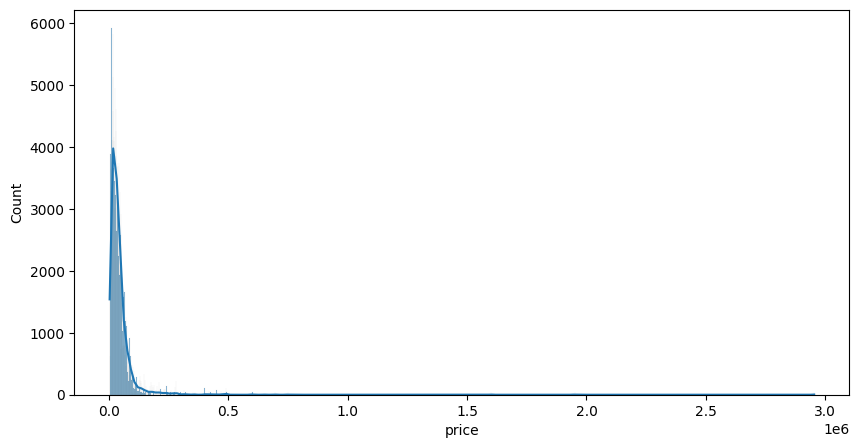

In [147]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["price"], kde=True);

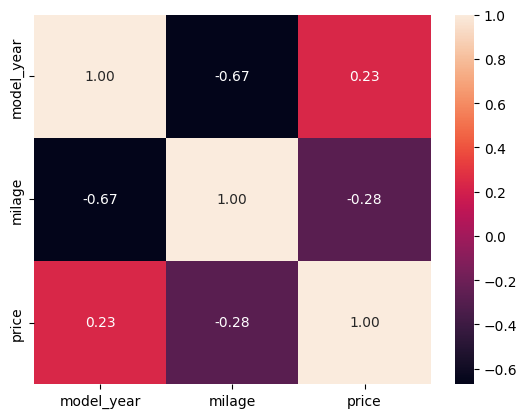

In [148]:
num_corr_mat = train_df.corr(numeric_only=True)

sns.heatmap(num_corr_mat, annot=True, fmt=".2f");

In [149]:
train_df["clean_title"].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.tenor.com%2Fv6j3qu9ZmMIAAAAM%2Ffunny-cat.gif&f=1&nofb=1&ipt=2e7aab02b1df9a345607e448d7b18ff08c6a74fbdc5a8ad8fd5321cabf08f331" style="border-radius:20px"><br>
What's the point?

In [150]:
train_df.drop("clean_title", axis=1, inplace=True)

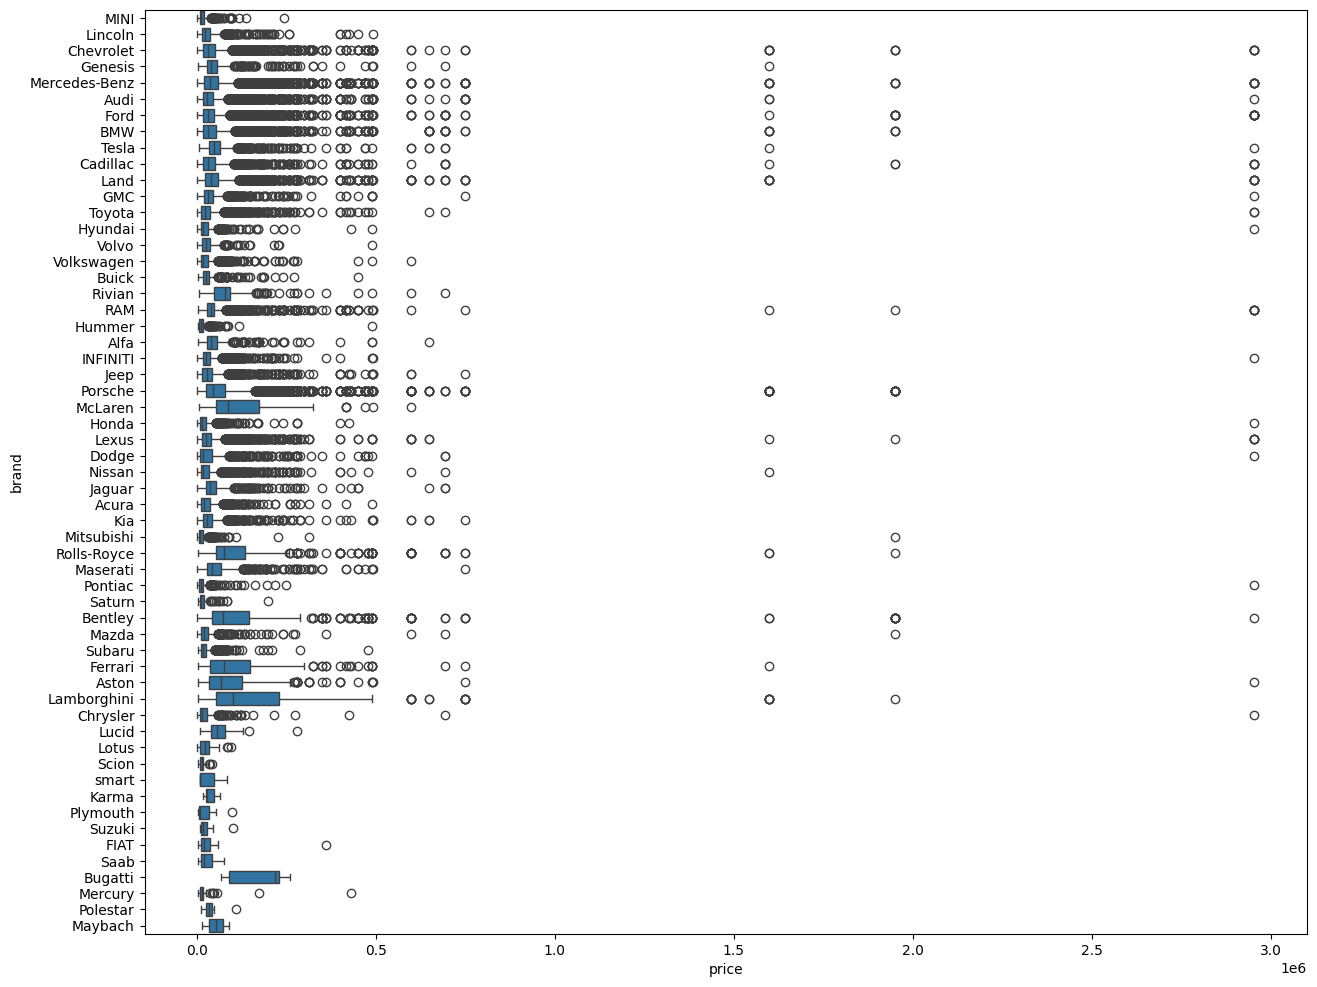

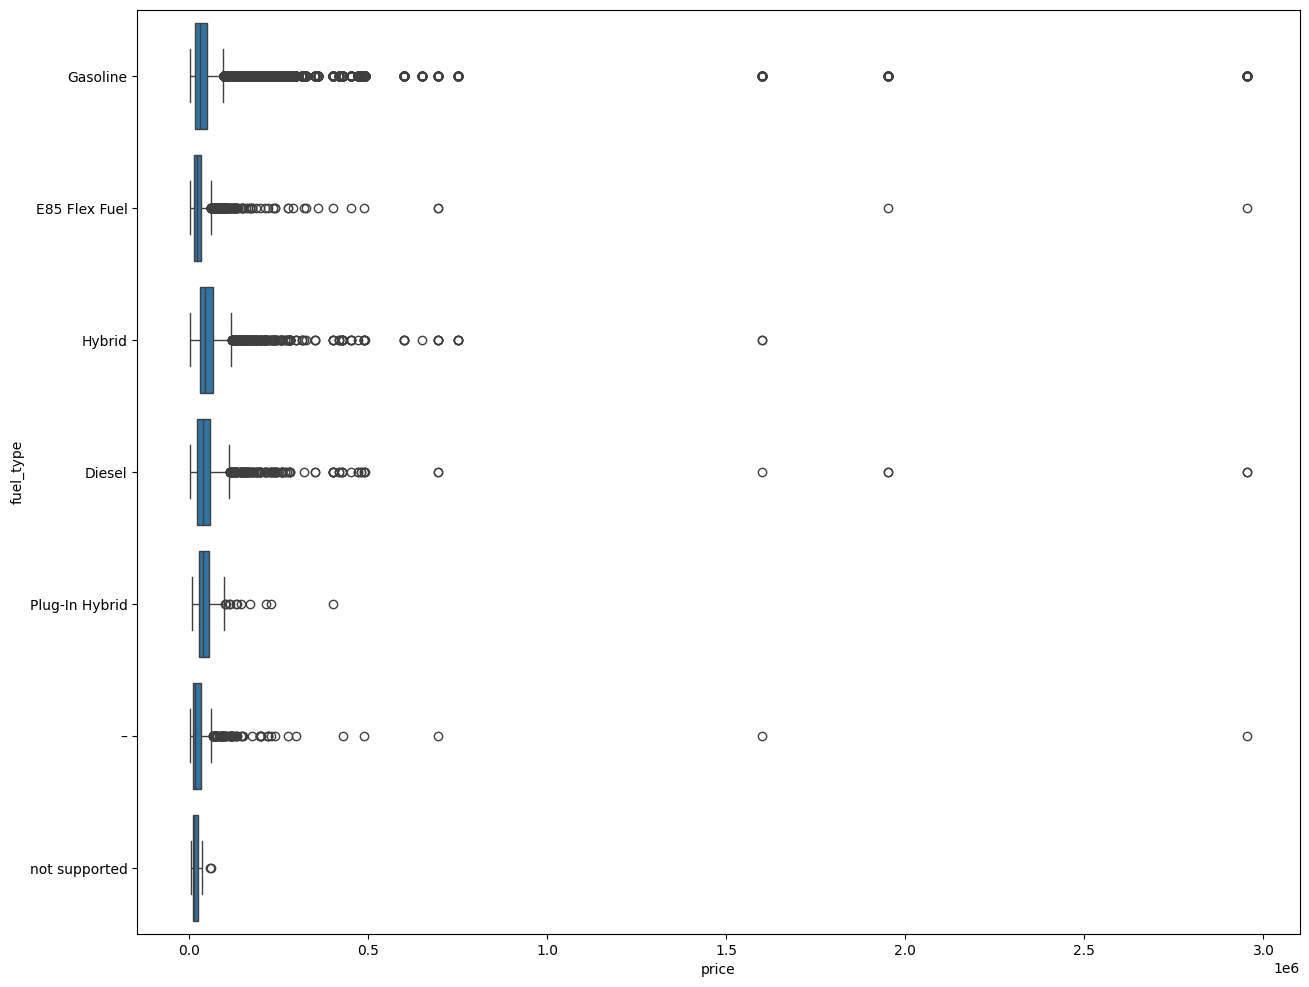

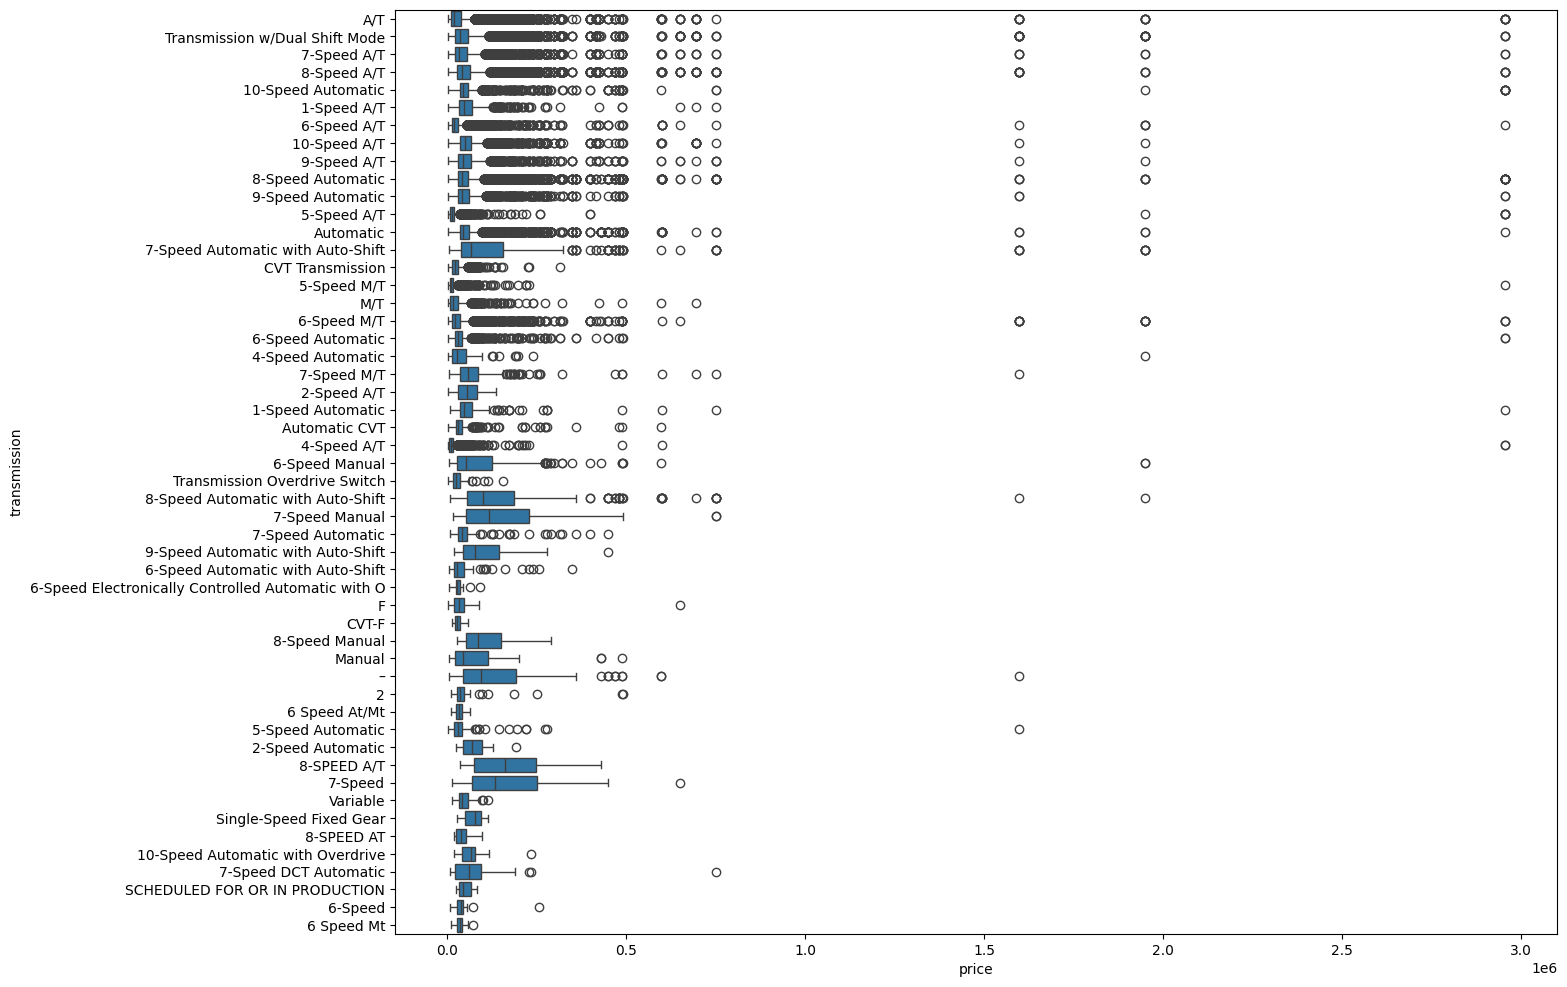

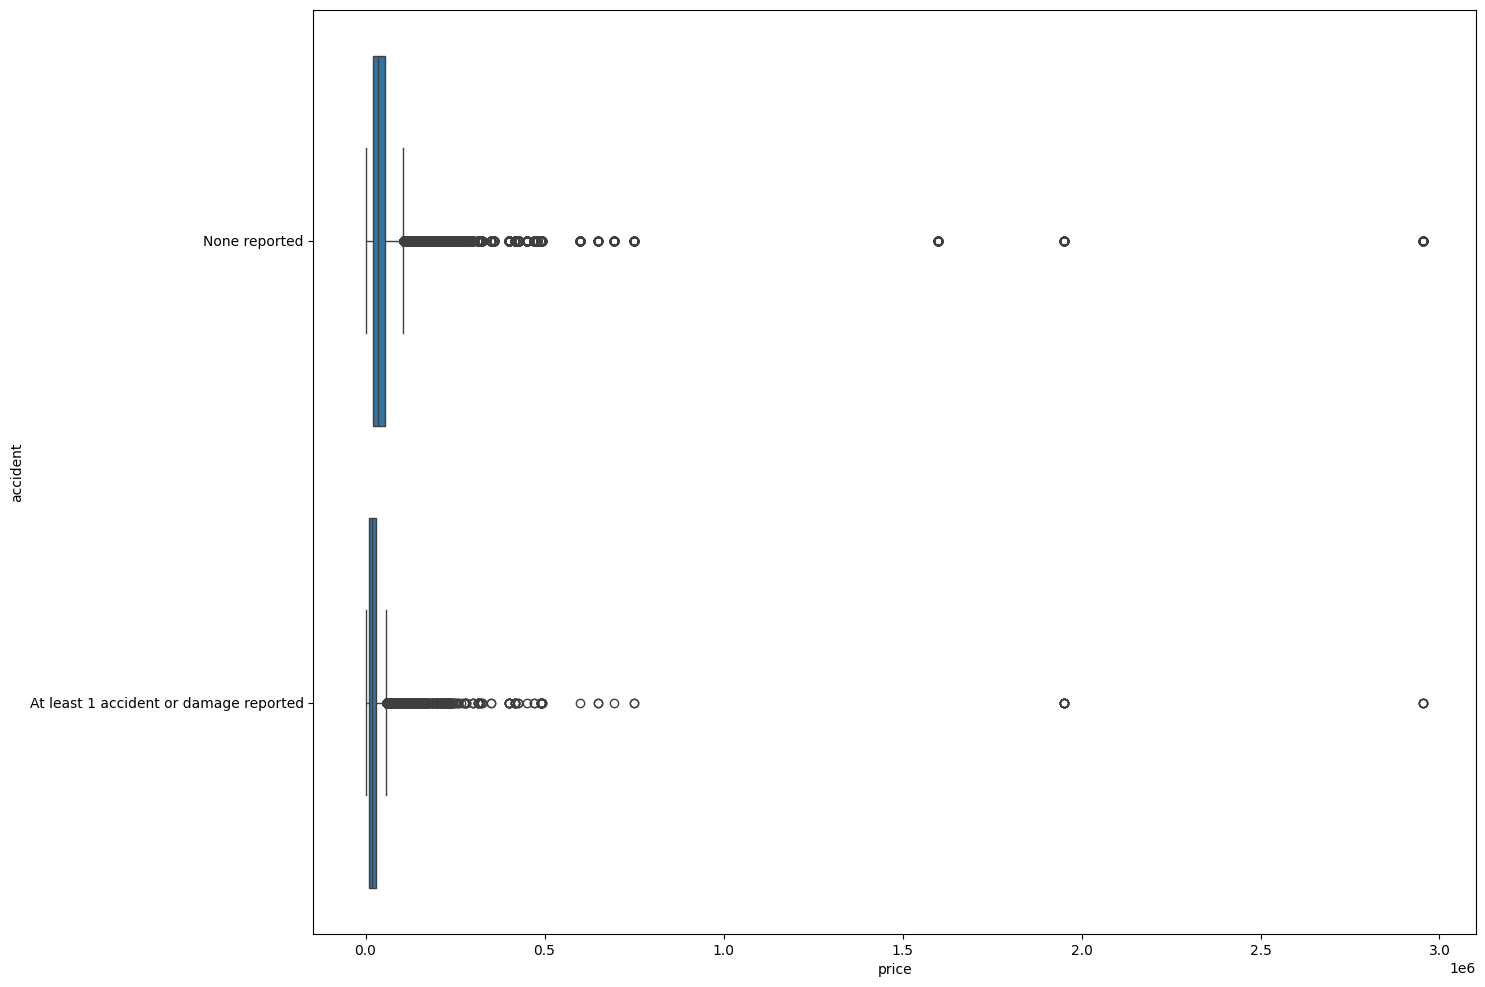

In [151]:
cat_feats = train_df.select_dtypes("object")
for i, feat in enumerate(cat_feats):
    if train_df[feat].nunique() >= 60: continue
    plt.figure(figsize=(15, 12))
    sns.boxplot(data=train_df, x="price", y=feat)

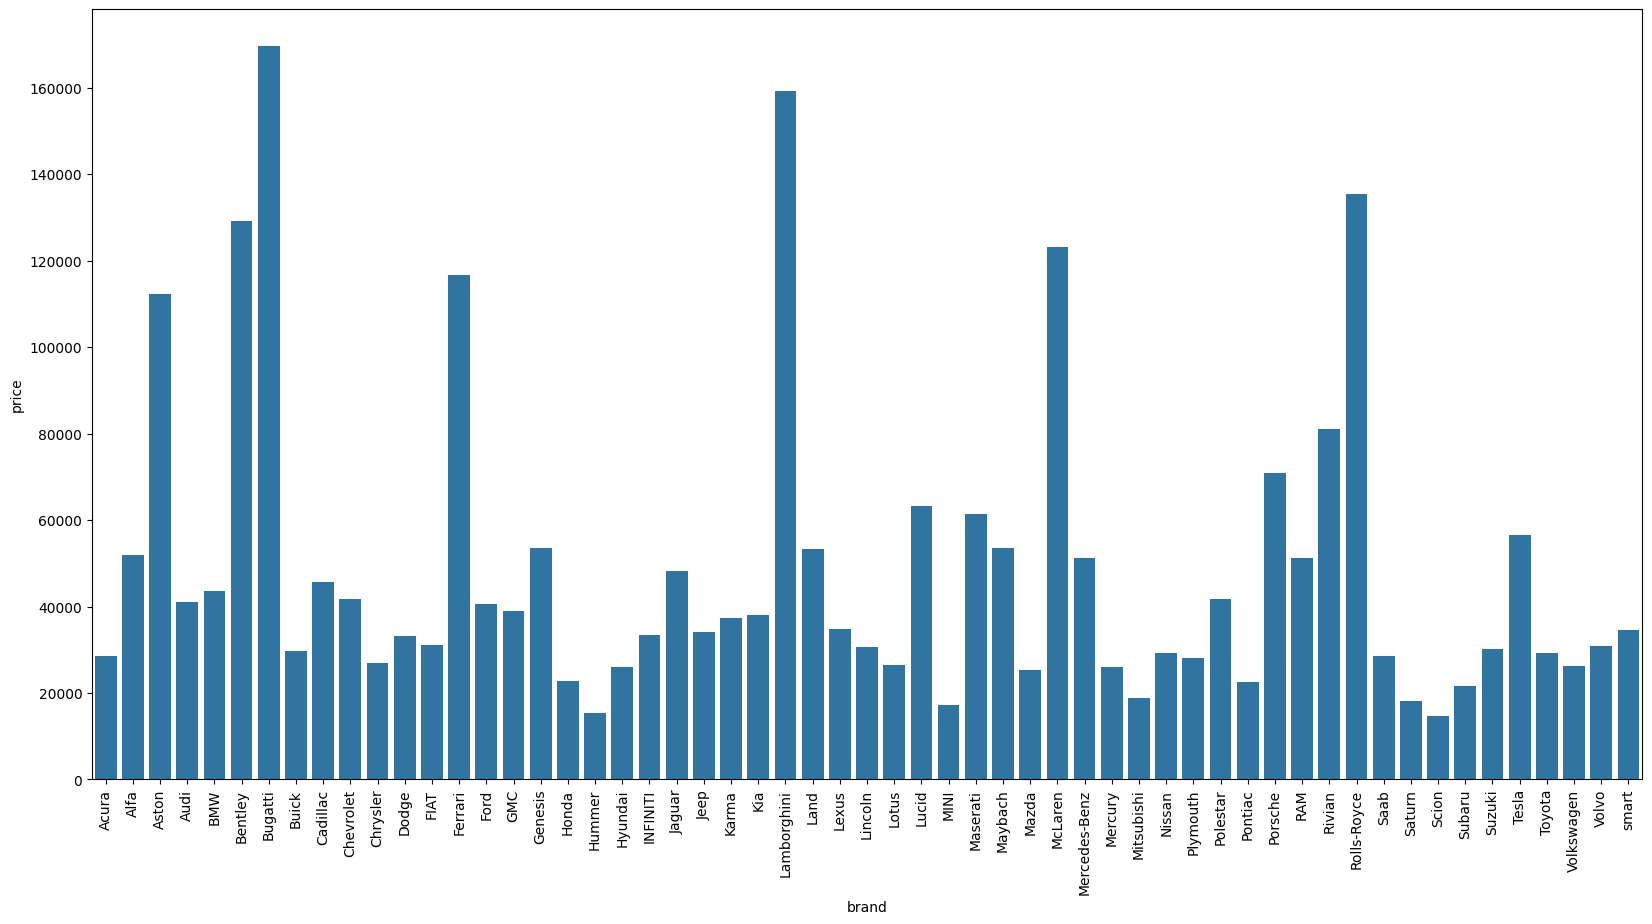

In [152]:
mean_prices = train_df.groupby("brand")["price"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(data=mean_prices, x="brand", y="price")
plt.xticks(rotation=90)
plt.show();

Well... Data looks promising, but... Fucking outliers

In [153]:
# Yeah... Let's do it.
q_low = train_df['price'].quantile(0.01)
q_high = train_df['price'].quantile(0.99)
train_df['price'] = train_df['price'].clip(lower=q_low, upper=q_high)

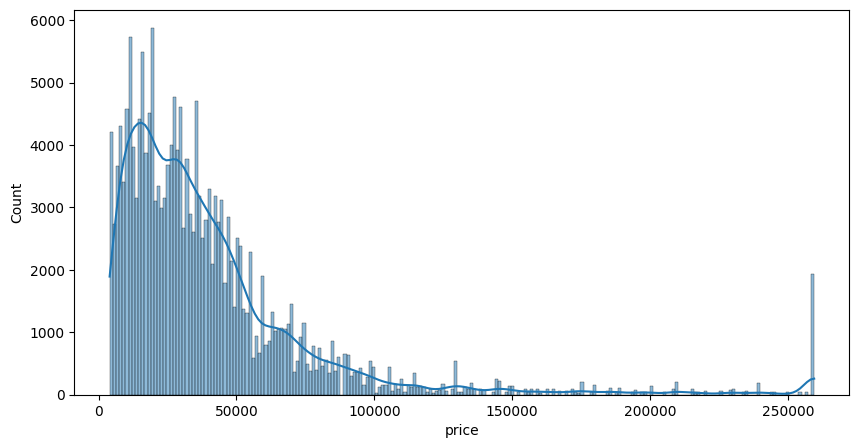

In [154]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["price"], kde=True);

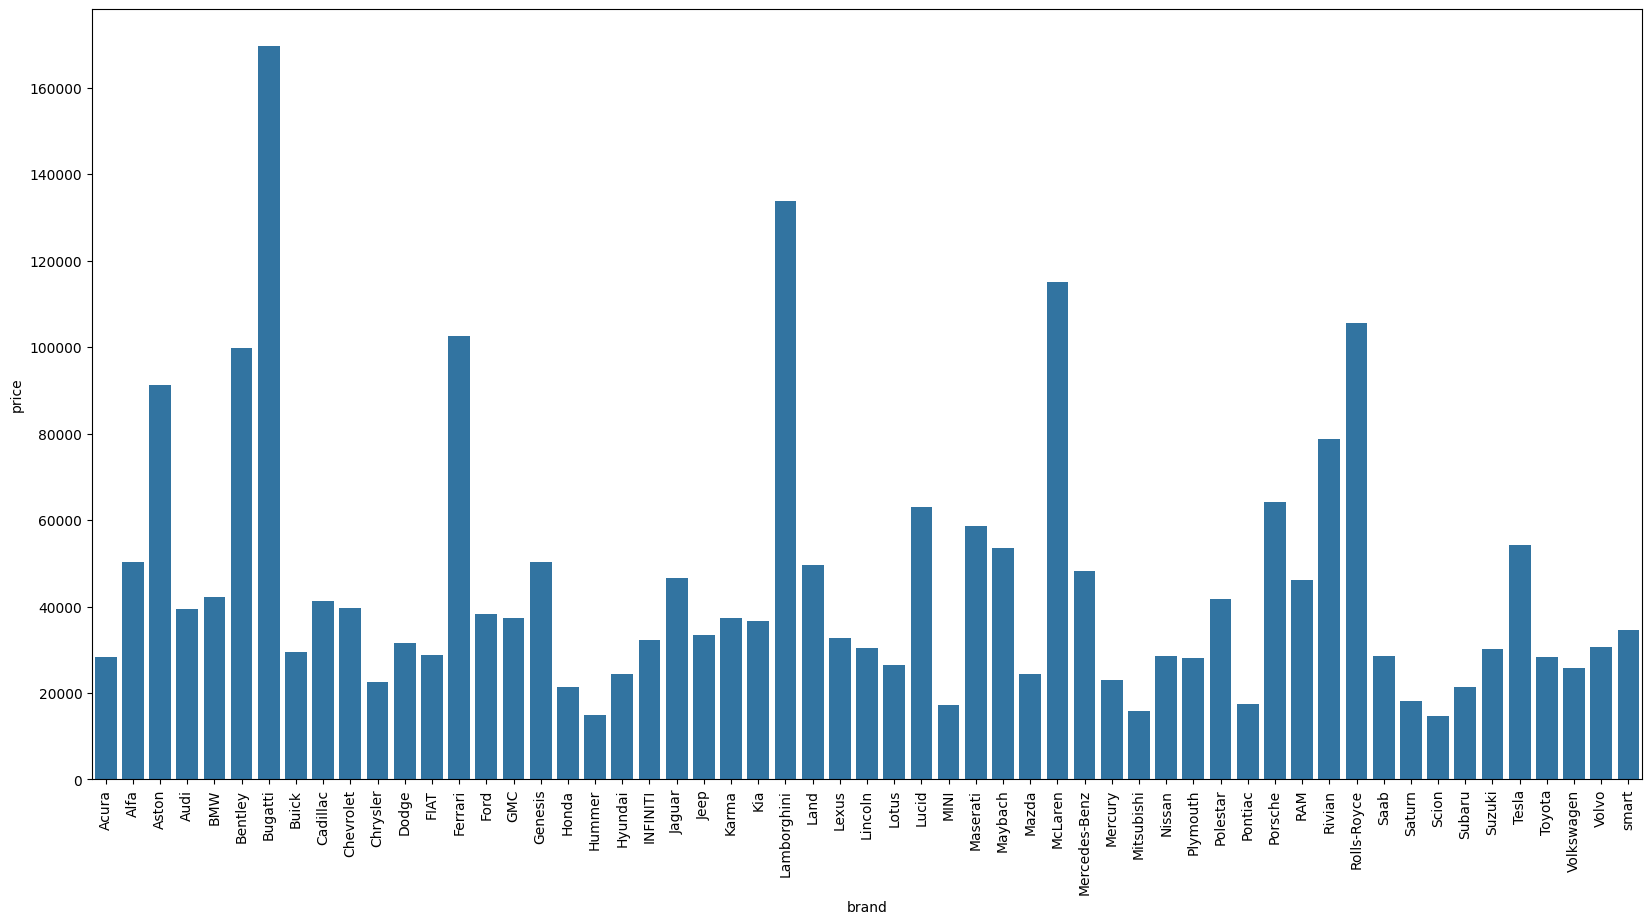

In [155]:
mean_prices = train_df.groupby("brand")["price"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(data=mean_prices, x="brand", y="price")
plt.xticks(rotation=90)
plt.show();

In [156]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500


In [157]:
train_df["engine"].nunique()

1117

**Preprocessing**

In [158]:
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [159]:
train_df.dropna(axis=0, inplace=True)
train_df.shape

(181067, 11)

In [160]:
X, y = train_df.drop("price", axis=1), train_df["price"]

In [161]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((162960, 10), (18107, 10), (162960,), (18107,))

In [162]:
train_df.describe(include="object").T

,count,unique,top,freq
brand,181067,57,Ford,22347
model,181067,1888,F-150 XLT,2881
fuel_type,181067,7,Gasoline,163853
engine,181067,1108,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3451
transmission,181067,52,A/T,46993
ext_col,181067,319,Black,46985
int_col,181067,156,Black,103365
accident,181067,2,None reported,139724


In [163]:
ordinals = []
ohes = []

for feature in cat_feats:
    idx = list(train_df).index(feature)
    if train_df[feature].nunique() >= 150:
        ordinals.append(idx)
    else:
        ohes.append(idx)

In [164]:
print(f"Ordinals: {[list(train_df)[o] for o in ordinals]}")
print(f"OHEs: {[list(train_df)[o] for o in ohes]}")

Ordinals: ['model', 'engine', 'ext_col', 'int_col']
OHEs: ['brand', 'fuel_type', 'transmission', 'accident']


In [165]:
numeric = list(train_df.select_dtypes("number"))[:-1]
numeric = [list(train_df).index(f) for f in numeric]
numeric

[2, 3]

In [166]:
pipeline = ColumnTransformer(transformers=[
    ("scaler", RobustScaler(), numeric),
    ("ordinal", OrdinalEncoder(), ordinals),
    ("OHE", OneHotEncoder(), ohes)
])

In [167]:
X_train = pipeline.fit_transform(X)

In [168]:
X_train.shape

(181067, 124)

I have some other things to do, but duuuuude... Later